In [1]:
%matplotlib inline

I've added forward and centered finite difference operators to the `finite.py` file that we can use in these notes.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import finite_lec7 as finite
from IPython.display import display, clear_output

Here's a base class to help us make and test different timestepping methods. It is designed to solve a problem of the form
$$ \partial_t u = f(u, t).$$

General Equation 

In [9]:
class Timestepper:

    def __init__(self):
        self.t = 0  # Time
        self.iter = 0 # Iteration 
        self.dt = None # Store pervious time stepper size
    
    # pass a time stepper size 
    def step(self, dt):
        self.u = self._step(dt) # Solution u 
        self.t += dt    # update the t 
        self.iter += 1

    # Keep evolve until hit the final time    
    def evolve(self, dt, end_time):
        while self.t < end_time - 1e-8:
            self.step(dt)


class ExplicitTimestepper(Timestepper):

    def __init__(self, u, f):
        super().__init__()
        self.u = u  # variable evolve in time
        self.f = f  # 

In [12]:
t = 0
dt = 1e-4

In [20]:
t += dt
t

0.0008000000000000001

## Forward Euler

Each timestepper needs a `_step` method. The Forward Euler method is
$$u^{n+1} = u^n + \Delta t f(u^n).$$

Next we can build our timestepper:

In [21]:
class ForwardEuler(ExplicitTimestepper):

    def _step(self, dt):
        # u^{n} = self.u
        # u^{n+1} = u^{n} + dt*self.f(self.u)
        # Just follow the forward euler function above  
        
        return self.u + dt* self.f(self.u)

In [5]:
L = 0.1
def IC(x):
    return np.exp(-(1+np.cos(x))**2/2/L**2) # initial conditions 

grid = finite.UniformPeriodicGrid(100, 2*np.pi)
x = grid.values
u = IC(x)

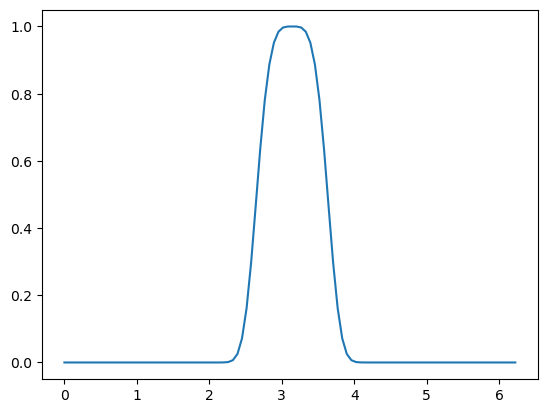

In [22]:
plt.figure
plt.plot(x,u)
plt.show()

We have to decide what `f` function to use. Here we will focus on the hyperbolic equation
$$ \partial_t u = \partial_x u $$
We can discretize $\partial_x$ with
1. Forward differencing
2. Centered differencing

In [29]:
grid = finite.UniformPeriodicGrid(100, 2*np.pi)
x = grid.values
u = IC(x)
# derivative operator 
d = finite.ForwardFiniteDifference(grid)
du = d @ u
def f(u):
    return d @ u
f = lambda u: d@u # same us the above function 

ts = ForwardEuler(u, f)

/Users/ericchen/opt/anaconda3/envs/446-1/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [30]:
ts.step(0.5*grid.dx)

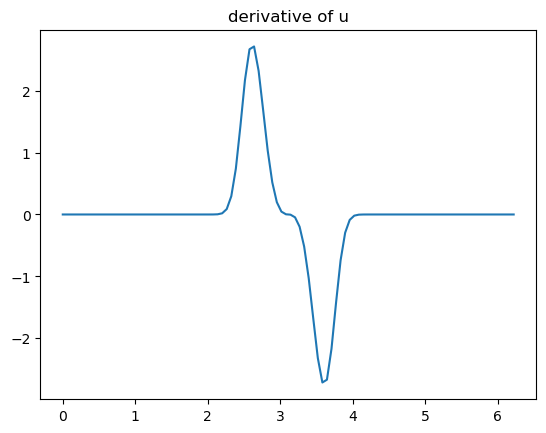

In [31]:
plt.figure()
plt.plot(x,du)
plt.title("derivative of u")
plt.show()

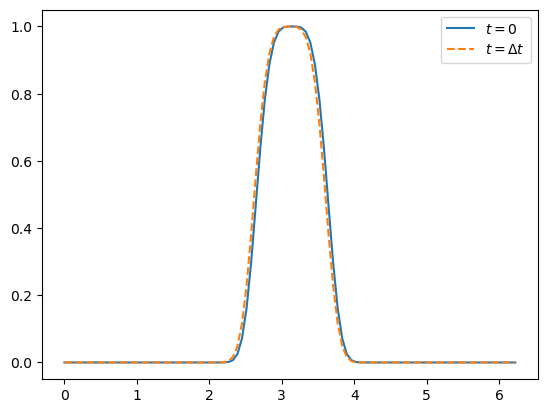

In [34]:
plt.figure()
plt.plot(x, IC(x), label=r'$t=0$')
plt.plot(x, ts.u, '--',label=r'$t=\Delta t$')
plt.legend()
plt.show()

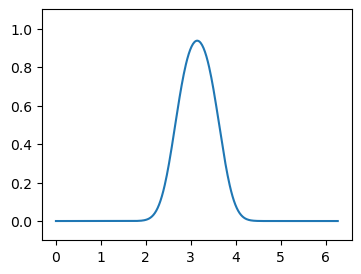

/var/folders/88/6pmmpt1j1yl6ry0001r5f_lr0000gn/T/ipykernel_86329/3397635752.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


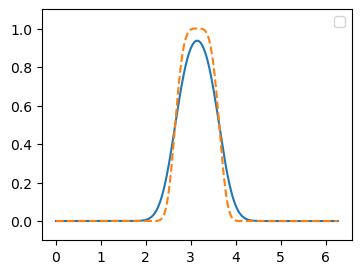

In [53]:
grid = finite.UniformPeriodicGrid(400, 2*np.pi)
x = grid.values

u = IC(x)
# derivative operator 
d = finite.ForwardFiniteDifference(grid)
f = lambda u: d@u # same us the above function 
ts = ForwardEuler(u, f)
dt = 0.5*grid.dx # CFI criterion prevents time step size
# dt = 1.5 * grid.dx # anti-diffusion 

output_cadence = 10

fig = plt.figure(figsize=(4,3))
p, = plt.plot(x, ts.u)  # plot solution 
plt.ylim([-0.1, 1.1])
while ts.t < 2*np.pi:
    ts.step(dt)
    if ts.iter % output_cadence == 0:   # every 10 time steps plot once 
        p.set_ydata(ts.u)
        clear_output(wait=True)
        display(fig)
plt.plot(x, IC(x), '--') # compare the the final with the initial condition 
plt.legend()
plt.show()

This is because the numerical errors occurs from time stepping, which will cause the initial condition to diffuse away.

If we increase the time step less than 1, it will has less diffusion. Because the diffusion is related to the time step and the spatial difference.

However, it only works for this specific equation for this time step scheme 

 Typically what you find is that as you make the time step smaller, you're going to get more and more accuracy, and as you make the time step larger and larger, you're going to get closer and closer to instability, and also the accuracy will go down

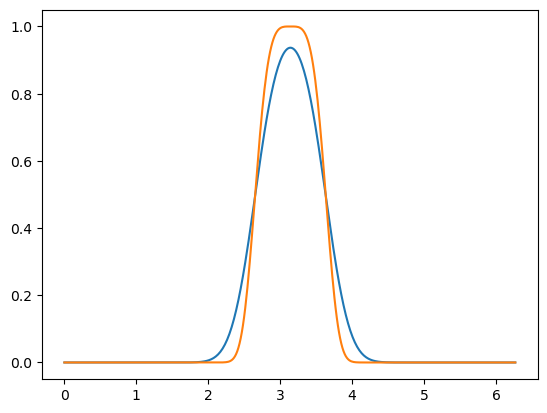

In [48]:
# dt = 1.5 * grid.dx # anti-diffusion 
plt.figure()
plt.plot(x, ts.u)
plt.plot(x, IC(x))
plt.show()

Now let's try central differencing.

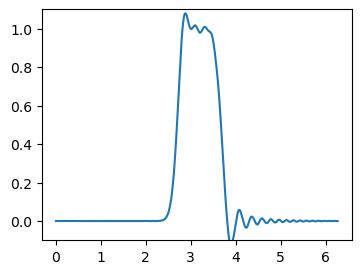

/var/folders/88/6pmmpt1j1yl6ry0001r5f_lr0000gn/T/ipykernel_86329/4078370136.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


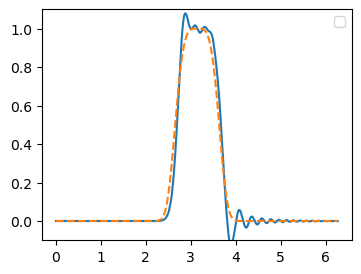

In [58]:
grid = finite.UniformPeriodicGrid(400, 2*np.pi)
x = grid.values

u = IC(x)
# derivative operator 
d = finite.CenteredFiniteDifference(grid)
f = lambda u: d@u # same us the above function 
ts = ForwardEuler(u, f)
dt = 0.15*grid.dx # CFI criterion prevents time step size
# dt = 1.5 * grid.dx # anti-diffusion 

output_cadence = 10

fig = plt.figure(figsize=(4,3))
p, = plt.plot(x, ts.u)  # plot solution 
plt.ylim([-0.1, 1.1])
while ts.t < 2*np.pi:
    ts.step(dt)
    if ts.iter % output_cadence == 0:   # every 10 time steps plot once 
        p.set_ydata(ts.u)
        clear_output(wait=True)
        display(fig)
plt.plot(x, IC(x), '--') # compare the the final with the initial condition 
plt.legend()
plt.show()